In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

from collections import Counter
import time
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import MBart50TokenizerFast

ko_tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50", src_lang="ko_KR")

def preprocess_src(text, tokenizer):
    tokens = tokenizer.tokenize(text)
    return tokens

def preprocess_trg_in(text, tokenizer):
  text = ['<sos>'] + tokenizer.tokenize((text))
  return text

def preprocess_trg_out(text, tokenizer):
  text = tokenizer.tokenize((text)) + ['<eos>']
  return text

df = pd.read_excel('./data/NLP_data/2_대화체.xlsx')
df['src_in'] = df['원문'].apply(lambda x : preprocess_src(x, ko_tokenizer))
df['trg_in'] = df['번역문'].apply(lambda x : preprocess_trg_in(x, ko_tokenizer))
df['trg_out'] = df['번역문'].apply(lambda x : preprocess_trg_out(x, ko_tokenizer))
df.drop(['대분류','소분류','Set Nr.','발화자','상황'], axis=1, inplace=True)
df

/home/kimjt/anaconda3/envs/torch/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,원문,번역문,src_in,trg_in,trg_out
0,이번 신제품 출시에 대한 시장의 반응은 어떤가요?,How is the market's reaction to the newly rele...,"[▁이번, ▁신, 제품, ▁출시, 에, ▁대한, ▁시장, 의, ▁반응, 은, ▁어떤...","[<sos>, ▁How, ▁is, ▁the, ▁market, ', s, ▁react...","[▁How, ▁is, ▁the, ▁market, ', s, ▁reaction, ▁t..."
1,판매량이 지난번 제품보다 빠르게 늘고 있습니다.,The sales increase is faster than the previous...,"[▁판매, 량이, ▁지난, 번, ▁제품, 보다, ▁빠르게, ▁늘, 고, ▁있습니다, .]","[<sos>, ▁The, ▁sales, ▁increase, ▁is, ▁fast, e...","[▁The, ▁sales, ▁increase, ▁is, ▁fast, er, ▁tha..."
2,그렇다면 공장에 연락해서 주문량을 더 늘려야겠네요.,"Then, we'll have to call the manufacturer and ...","[▁그렇다면, ▁공, 장, 에, ▁연락, 해서, ▁주문, 량을, ▁더, ▁늘, 려,...","[<sos>, ▁Then, ,, ▁we, ', ll, ▁have, ▁to, ▁cal...","[▁Then, ,, ▁we, ', ll, ▁have, ▁to, ▁call, ▁the..."
3,"네, 제가 연락해서 주문량을 2배로 늘리겠습니다.","Sure, I'll make a call and double the volume o...","[▁네, ,, ▁제가, ▁연락, 해서, ▁주문, 량을, ▁2, 배, 로, ▁늘, 리...","[<sos>, ▁Sur, e, ,, ▁I, ', ll, ▁make, ▁a, ▁cal...","[▁Sur, e, ,, ▁I, ', ll, ▁make, ▁a, ▁call, ▁and..."
4,지난 회의 마지막에 논의했던 안건을 다시 볼까요?,Shall we take a look at the issues we discusse...,"[▁지난, ▁, 회의, ▁마지막, 에, ▁논의, 했던, ▁안, 건, 을, ▁다시, ...","[<sos>, ▁S, hall, ▁we, ▁take, ▁a, ▁look, ▁at, ...","[▁S, hall, ▁we, ▁take, ▁a, ▁look, ▁at, ▁the, ▁..."
...,...,...,...,...,...
99995,"저희가 가격표 배치를 잘못해서 혼동을 드렸나 봐요, 죄송해요.",It seems that we didn't place the price tags c...,"[▁저희, 가, ▁가격, 표, ▁배치, 를, ▁잘못, 해서, ▁, 혼, 동, 을, ...","[<sos>, ▁It, ▁seems, ▁that, ▁we, ▁didn, ', t, ...","[▁It, ▁seems, ▁that, ▁we, ▁didn, ', t, ▁place,..."
99996,"백화점 포인트로 계산하고 싶은데, 가능한가요?",Can I pay using the department store points?,"[▁, 백화점, ▁포인트, 로, ▁계산, 하고, ▁싶은, 데, ,, ▁가능한, 가요...","[<sos>, ▁Can, ▁I, ▁pay, ▁using, ▁the, ▁departm...","[▁Can, ▁I, ▁pay, ▁using, ▁the, ▁department, ▁s..."
99997,"네, 물론이죠, 전화번호 입력해주시면 됩니다.","Yes, of course, you just need to enter your ph...","[▁네, ,, ▁물론, 이죠, ,, ▁전화, 번호, ▁입력, 해, 주시면, ▁됩니다...","[<sos>, ▁Yes, ,, ▁of, ▁course, ,, ▁you, ▁just,...","[▁Yes, ,, ▁of, ▁course, ,, ▁you, ▁just, ▁need,..."
99998,"입력했어요, 전액 백화점 포인트로 결제하고 싶어요.","I entered it, I want to pay it with all the de...","[▁입력, 했어요, ,, ▁전, 액, ▁, 백화점, ▁포인트, 로, ▁결제, 하고,...","[<sos>, ▁I, ▁enter, ed, ▁it, ,, ▁I, ▁want, ▁to...","[▁I, ▁enter, ed, ▁it, ,, ▁I, ▁want, ▁to, ▁pay,..."


In [ ]:
def build_vocab(sents):
  word_list = []

  for sent in sents:
    for word in sent:
      word_list.append(word)

  # 각 단어별 등장 빈도를 계산하여 등장 빈도가 높은 순서로 정렬
  # Counter는 단어를 키(key), 등장 빈도를 값(value)으로 가지도록 반환
  word_counts = Counter(word_list)
  vocab = sorted(word_counts, key=word_counts.get, reverse=True)

  word_to_index = {}
  word_to_index['<PAD>'] = 0
  word_to_index['<UNK>'] = 1

  # 등장 빈도가 높은 단어일수록 낮은 정수를 부여
  for index, word in enumerate(vocab) :
    if word != '<PAD>':
      word_to_index[word] = index + 2

  return word_to_index

src_input = df['src_in'].to_list()
trg_input = df['trg_in'].to_list()
trg_output = df['trg_out'].to_list()

src_vocab = build_vocab(src_input)
tar_vocab = build_vocab(trg_input + trg_output)

src_vocab_size = len(src_vocab)
tar_vocab_size = len(tar_vocab)
print("한국어 단어 집합의 크기 : {:d}, 영어어 단어 집합의 크기 : {:d}".format(src_vocab_size, tar_vocab_size))

한국어 단어 집합의 크기 : 5752, 영어어 단어 집합의 크기 : 11372


In [ ]:
print(src_vocab)
print(tar_vocab)

{'<PAD>': 0, '<UNK>': 1, '.': 2, '▁': 3, '?': 4, ',': 5, '이': 6, '에': 7, '을': 8, '요': 9, '가': 10, '은': 11, '서': 12, '도': 13, '는': 14, '를': 15, '▁수': 16, '지': 17, '로': 18, '고': 19, '해': 20, '▁것': 21, '데': 22, '게': 23, '어': 24, '에서': 25, '야': 26, '▁이': 27, '▁그': 28, '▁네': 29, '▁안': 30, '으로': 31, '만': 32, '▁거': 33, '는데': 34, '▁가': 35, '한': 36, '나요': 37, '면': 38, '가요': 39, '할': 40, '아': 41, '일': 42, '시': 43, '▁건': 44, '▁한': 45, '▁제가': 46, '네요': 47, '의': 48, '▁있는': 49, '하고': 50, '어요': 51, '기': 52, '▁그럼': 53, '주': 54, '▁나': 55, '▁더': 56, '▁다': 57, '까요': 58, '▁너무': 59, '실': 60, '▁어': 61, '인': 62, '니까': 63, '▁할': 64, '▁있나요': 65, '▁지금': 66, '▁잘': 67, '▁내': 68, '▁해': 69, '겠': 70, '▁같': 71, '▁게': 72, '해서': 73, '드릴': 74, '하': 75, '▁좀': 76, '▁혹시': 77, '하는': 78, '▁주': 79, '▁있습니다': 80, '셔': 81, '까지': 82, '▁저': 83, '▁아': 84, '겠습니다': 85, '니': 86, '라': 87, '▁저희': 88, '▁되': 89, '입니다': 90, '▁오늘': 91, '리': 92, '▁다른': 93, '▁같은': 94, '▁많이': 95, '▁보': 96, '▁사': 97, '▁주문': 98, '과': 99, '으': 100, '분': 101, '드리'

In [ ]:
index_to_src = {v: k for k, v in src_vocab.items()}
index_to_tar = {v: k for k, v in tar_vocab.items()}

In [ ]:
df['src_in_len'] = df['src_in'].apply(len)
df['trg_in_len'] = df['trg_in'].apply(len)

In [ ]:
max_len = 30
df = df[df['src_in_len'] <= max_len].reset_index(drop=True)
df

,원문,번역문,src_in,trg_in,trg_out,src_in_len,trg_in_len
0,이번 신제품 출시에 대한 시장의 반응은 어떤가요?,How is the market's reaction to the newly rele...,"[▁이번, ▁신, 제품, ▁출시, 에, ▁대한, ▁시장, 의, ▁반응, 은, ▁어떤...","[<sos>, ▁How, ▁is, ▁the, ▁market, ', s, ▁react...","[▁How, ▁is, ▁the, ▁market, ', s, ▁reaction, ▁t...",13,15
1,판매량이 지난번 제품보다 빠르게 늘고 있습니다.,The sales increase is faster than the previous...,"[▁판매, 량이, ▁지난, 번, ▁제품, 보다, ▁빠르게, ▁늘, 고, ▁있습니다, .]","[<sos>, ▁The, ▁sales, ▁increase, ▁is, ▁fast, e...","[▁The, ▁sales, ▁increase, ▁is, ▁fast, er, ▁tha...",11,12
2,그렇다면 공장에 연락해서 주문량을 더 늘려야겠네요.,"Then, we'll have to call the manufacturer and ...","[▁그렇다면, ▁공, 장, 에, ▁연락, 해서, ▁주문, 량을, ▁더, ▁늘, 려,...","[<sos>, ▁Then, ,, ▁we, ', ll, ▁have, ▁to, ▁cal...","[▁Then, ,, ▁we, ', ll, ▁have, ▁to, ▁call, ▁the...",15,20
3,"네, 제가 연락해서 주문량을 2배로 늘리겠습니다.","Sure, I'll make a call and double the volume o...","[▁네, ,, ▁제가, ▁연락, 해서, ▁주문, 량을, ▁2, 배, 로, ▁늘, 리...","[<sos>, ▁Sur, e, ,, ▁I, ', ll, ▁make, ▁a, ▁cal...","[▁Sur, e, ,, ▁I, ', ll, ▁make, ▁a, ▁call, ▁and...",14,18
4,지난 회의 마지막에 논의했던 안건을 다시 볼까요?,Shall we take a look at the issues we discusse...,"[▁지난, ▁, 회의, ▁마지막, 에, ▁논의, 했던, ▁안, 건, 을, ▁다시, ...","[<sos>, ▁S, hall, ▁we, ▁take, ▁a, ▁look, ▁at, ...","[▁S, hall, ▁we, ▁take, ▁a, ▁look, ▁at, ▁the, ▁...",14,21
...,...,...,...,...,...,...,...
99296,"저희가 가격표 배치를 잘못해서 혼동을 드렸나 봐요, 죄송해요.",It seems that we didn't place the price tags c...,"[▁저희, 가, ▁가격, 표, ▁배치, 를, ▁잘못, 해서, ▁, 혼, 동, 을, ...","[<sos>, ▁It, ▁seems, ▁that, ▁we, ▁didn, ', t, ...","[▁It, ▁seems, ▁that, ▁we, ▁didn, ', t, ▁place,...",23,24
99297,"백화점 포인트로 계산하고 싶은데, 가능한가요?",Can I pay using the department store points?,"[▁, 백화점, ▁포인트, 로, ▁계산, 하고, ▁싶은, 데, ,, ▁가능한, 가요...","[<sos>, ▁Can, ▁I, ▁pay, ▁using, ▁the, ▁departm...","[▁Can, ▁I, ▁pay, ▁using, ▁the, ▁department, ▁s...",12,10
99298,"네, 물론이죠, 전화번호 입력해주시면 됩니다.","Yes, of course, you just need to enter your ph...","[▁네, ,, ▁물론, 이죠, ,, ▁전화, 번호, ▁입력, 해, 주시면, ▁됩니다...","[<sos>, ▁Yes, ,, ▁of, ▁course, ,, ▁you, ▁just,...","[▁Yes, ,, ▁of, ▁course, ,, ▁you, ▁just, ▁need,...",12,15
99299,"입력했어요, 전액 백화점 포인트로 결제하고 싶어요.","I entered it, I want to pay it with all the de...","[▁입력, 했어요, ,, ▁전, 액, ▁, 백화점, ▁포인트, 로, ▁결제, 하고,...","[<sos>, ▁I, ▁enter, ed, ▁it, ,, ▁I, ▁want, ▁to...","[▁I, ▁enter, ed, ▁it, ,, ▁I, ▁want, ▁to, ▁pay,...",14,18


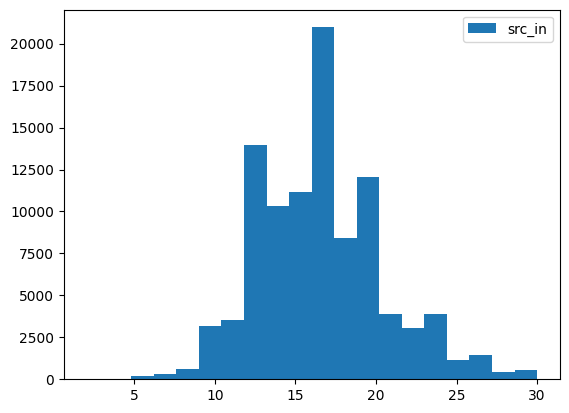

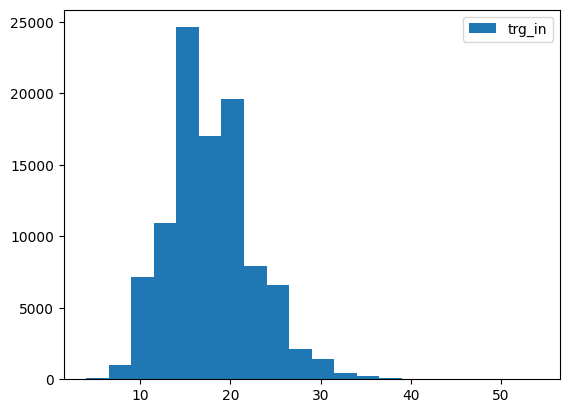

In [ ]:
plt.hist(df['src_in_len'], label='src_in', bins=20)
plt.legend()
plt.show()
plt.hist(df['trg_in_len'], label='trg_in', bins=20)
plt.legend()
plt.show()

In [ ]:
src_length= int(df['src_in_len'].max())
trg_length = int(df['trg_in_len'].max())

# 원문 패딩 및 인코딩
def src_encoding(tokens):
    # (src_length - 토큰 수) 만큼 패딩토큰 추가
    tokens = tokens + ['<PAD>'] *  (src_length - len(tokens))

    # 인코딩 된 숫자를 담아 둘 리스트
    index_sequences = []

    # 문장에서 토큰을 꺼내오며
    for word in tokens:
      try: # 토큰 인코딩 (단어 사전에 없는 토큰이 들어오면 except로)
          index_sequences.append(src_vocab[word])
      except KeyError: # 단어 사전에 없는 토큰이 들어오면 '<UNK>' 토큰의 숫자로 변환
          index_sequences.append(src_vocab['<UNK>'])

    return index_sequences

# 번역문 패딩 및 인코딩
def trg_encoding(tokens):
    tokens = tokens + ['<PAD>'] * (trg_length - len(tokens))
    index_sequences = []
    for word in tokens:
      try:
          index_sequences.append(tar_vocab[word])
      except KeyError:
          index_sequences.append(tar_vocab['<UNK>'])

    return index_sequences

# 데이터프레임의 원문과 번역문 각각에 패딩 및 인코딩 적용
df['src_in'] = df['src_in'].apply(lambda x : src_encoding(x))
df['trg_in'] = df['trg_in'].apply(lambda x : trg_encoding(x))
df['trg_out'] = df['trg_out'].apply(lambda x : trg_encoding(x))
df

,원문,번역문,src_in,trg_in,trg_out,src_in_len,trg_in_len
0,이번 신제품 출시에 대한 시장의 반응은 어떤가요?,How is the market's reaction to the newly rele...,"[172, 174, 993, 1203, 7, 856, 1505, 48, 1797, ...","[6, 121, 15, 4, 686, 8, 11, 2227, 9, 4, 135, 9...","[121, 15, 4, 686, 8, 11, 2227, 9, 4, 135, 91, ...",13,15
1,판매량이 지난번 제품보다 빠르게 늘고 있습니다.,The sales increase is faster than the previous...,"[476, 1381, 727, 173, 149, 263, 2199, 1400, 19...","[6, 53, 358, 883, 15, 483, 139, 138, 4, 1055, ...","[53, 358, 883, 15, 483, 139, 138, 4, 1055, 112...",11,12
2,그렇다면 공장에 연락해서 주문량을 더 늘려야겠네요.,"Then, we'll have to call the manufacturer and ...","[490, 467, 108, 7, 290, 73, 98, 1891, 56, 1400...","[6, 69, 5, 28, 8, 41, 22, 9, 203, 4, 2750, 420...","[69, 5, 28, 8, 41, 22, 9, 203, 4, 2750, 420, 1...",15,20
3,"네, 제가 연락해서 주문량을 2배로 늘리겠습니다.","Sure, I'll make a call and double the volume o...","[29, 5, 46, 290, 73, 98, 1891, 150, 529, 18, 1...","[6, 302, 89, 5, 3, 8, 41, 111, 13, 203, 16, 11...","[302, 89, 5, 3, 8, 41, 111, 13, 203, 16, 1144,...",14,18
4,지난 회의 마지막에 논의했던 안건을 다시 볼까요?,Shall we take a look at the issues we discusse...,"[727, 3, 250, 1197, 7, 2843, 672, 30, 399, 8, ...","[6, 1112, 1714, 28, 58, 13, 155, 39, 4, 1715, ...","[1112, 1714, 28, 58, 13, 155, 39, 4, 1715, 28,...",14,21
...,...,...,...,...,...,...,...
99296,"저희가 가격표 배치를 잘못해서 혼동을 드렸나 봐요, 죄송해요.",It seems that we didn't place the price tags c...,"[88, 10, 297, 547, 2931, 15, 711, 73, 3, 1734,...","[6, 33, 287, 24, 28, 157, 8, 17, 196, 4, 209, ...","[33, 287, 24, 28, 157, 8, 17, 196, 4, 209, 593...",23,24
99297,"백화점 포인트로 계산하고 싶은데, 가능한가요?",Can I pay using the department store points?,"[3, 1559, 2011, 18, 475, 50, 186, 22, 5, 287, ...","[6, 134, 3, 150, 371, 4, 319, 194, 877, 12, 0,...","[134, 3, 150, 371, 4, 319, 194, 877, 12, 7, 0,...",12,10
99298,"네, 물론이죠, 전화번호 입력해주시면 됩니다.","Yes, of course, you just need to enter your ph...","[29, 5, 925, 1248, 5, 232, 502, 1668, 20, 218,...","[6, 59, 5, 21, 303, 5, 10, 79, 62, 9, 761, 45,...","[59, 5, 21, 303, 5, 10, 79, 62, 9, 761, 45, 27...",12,15
99299,"입력했어요, 전액 백화점 포인트로 결제하고 싶어요.","I entered it, I want to pay it with all the de...","[1668, 679, 5, 225, 889, 3, 1559, 2011, 18, 27...","[6, 3, 761, 36, 14, 5, 3, 64, 9, 150, 14, 38, ...","[3, 761, 36, 14, 5, 3, 64, 9, 150, 14, 38, 92,...",14,18


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터프레임에서 무작위로 80%를 훈련 데이터로, 20%를 검증 데이터로 분할
train_df, test_df = train_test_split(df, test_size=0.1, random_state=1004)
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=1004)

# 결과 확인
print(f"훈련 데이터 크기: {len(train_df)}")
print(f"검증 데이터 크기: {len(valid_df)}")
print(f"테스트 데이터 크기: {len(test_df)}")

훈련 데이터 크기: 71496
검증 데이터 크기: 17874
테스트 데이터 크기: 9931


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class TranslationDataset(Dataset):
    def __init__(self, dataframe):
        # df로부터 원문과 번역문을 받아옴
        self.src_in = dataframe['src_in'].values
        self.trg_in = dataframe['trg_in'].values
        self.trg_out = dataframe['trg_out'].values

    def __len__(self):
        return len(self.src_in)

    def __getitem__(self, idx):
        src_seq = torch.tensor(self.src_in[idx], dtype=torch.long)
        trg_in_seq = torch.tensor(self.trg_in[idx], dtype=torch.long)
        trg_out_seq = torch.tensor(self.trg_out[idx], dtype=torch.long)

        return src_seq, trg_in_seq, trg_out_seq

In [ ]:
# 하이퍼파라미터 설정
BATCH_SIZE = 256

# 훈련 데이터셋 및 데이터로더
train_dataset = TranslationDataset(train_df)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# 검증 데이터셋 및 데이터로더
valid_dataset = TranslationDataset(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 테스트 데이터셋 및 데이터로더
test_dataset = TranslationDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 2. seq2seq with attention

어텐션 메커니즘은 Seq2Seq 모델에서 디코더가 입력 시퀀스의 특정 부분에 집중할 수 있게 도와주는 방법입니다. 이를 통해 디코더는 더 정확한 출력을 생성할 수 있습니다.

주요 단계
- 어텐션 가중치 계산: 디코더의 현재 상태와 인코더의 각 상태 사이의 유사성을 점수 함수로 계산합니다. --> Q, K의 내적
- 가중치 정규화: 점수 값을 소프트맥스 함수로 정규화하여 어텐션 가중치를 얻습니다. --> 0~1사이 값으로
- 컨텍스트 벡터 생성: 어텐션 가중치를 사용해 인코더의 숨겨진 상태를 가중 합산하여 컨텍스트 벡터를 만듭니다. --> V를 곱해서 가중 평균함으로 정보를 취합
- 디코더 출력: 디코더는 현재 상태와 컨텍스트 벡터를 결합하여 최종 출력을 생성합니다.
이 과정을 통해 디코더는 입력 시퀀스의 중요한 부분에 집중하여 더 정확한 출력을 생성할 수 있습니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

embedding_dim = 256
hidden_units = 512

In [ ]:
class Encoder(nn.Module):
    def __init__(self, src_vocab_size, embedding_dim, hidden_units):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(src_vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_units, batch_first=True)

    def forward(self, x):
        x = self.embedding(x)
        # x.shape == (batch_size, seq_len, embedding_dim)
        outputs, hidden = self.gru(x)
        # hidden.shape == (1, batch_size, hidden_units), cell.shape == (1, batch_size, hidden_units)
        return outputs, hidden

In [ ]:
import torch
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self, tar_vocab_size, embedding_dim, hidden_units):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(tar_vocab_size, embedding_dim, padding_idx=0)
        self.gru = nn.GRU(embedding_dim, hidden_units, batch_first=True)
        self.fc = nn.Linear(hidden_units + hidden_units, tar_vocab_size)  # 컨텍스트 벡터와 결합된 상태로 출력하기 위해 크기를 조정
        self.softmax = nn.Softmax(dim=-1)  # Attention weights 계산

    def forward(self, x, encoder_outputs, hidden): # decoder (x, final H), attention(Q, K, V)
        # x.shape: (batch_size, target_seq_len)
        batch_size = x.shape[0]
        seq_len = x.shape[1]

        # 임베딩을 통해 입력 변환
        x = self.embedding(x)  # x.shape: (batch_size, target_seq_len, embedding_dim)

        # 전체 출력 저장할 텐서 초기화
        outputs = torch.zeros(batch_size, seq_len, self.fc.out_features).to(x.device)

        for t in range(seq_len):
            # LSTM 통과 # (배치, 시퀀스길이, 임베딩차원)
            # x_t = x[:, t, :] -> (배치, 1, 임베딩차원)

            x_t = x[:, t, :].unsqueeze(1)  # 현재 타임스텝의 입력 (batch_size, 1, embedding_dim)

            output, hidden = self.gru(x_t, hidden)  # output.shape: (batch_size, 1, hidden_units)

            # Attention 계산
            # hidden : (층수, batch, hidden_units)
            # 알고 싶어 하는 현재 정보 Q
            hidden_current = hidden[-1].unsqueeze(1)  # hidden_current.shape: (batch_size), (1, hidden_units)
            # encoder_outputs.shape  : (배치사이즈) (시퀀스길이, hidden_units)

            # 참고할만한 데이터 K, V
            encoder_outputs_permuted = encoder_outputs.permute(0, 2, 1)  # (batch_size, hidden_units, src_seq_len)

            # 어텐션 스코어 계산
            # 배치단위로 (1,hidden) * (hidden, src_seq_len) -> (1, src_seq_len)
            attention_scores = torch.bmm(hidden_current, encoder_outputs_permuted)  # (batch_size, 1, src_seq_len)

            # 어텐션 가중치 계산
            attention_weights = self.softmax(attention_scores)  # (batch_size, 1, src_seq_len)

            # 컨텍스트 벡터 계산
            # 배치단위로 (1,src_seq_len) * (src_seq_len, hidden_units)
            # Value를 곱하기
            context_vector = torch.bmm(attention_weights, encoder_outputs)  # (batch_size, 1, hidden_units)
            context_vector = context_vector.squeeze(1)  # (batch_size, hidden_units)

            # LSTM 출력과 컨텍스트 벡터 결합
            # Q정보와 Attention을 모두 사용 --> concat
            output_combined = torch.cat((output.squeeze(1), context_vector), dim=1)  # (batch_size, hidden_units * 2)

            # FC 레이어를 통해 최종 출력 계산
            output = self.fc(output_combined)  # output.shape: (batch_size, tar_vocab_size)
            outputs[:, t, :] = output # 해당 time step에서의 결과물

        return outputs, hidden


In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg):
        encoder_outputs, hidden = self.encoder(src)
        output, _ = self.decoder(trg, encoder_outputs, hidden)
        return output

encoder = Encoder(src_vocab_size, embedding_dim, hidden_units)
decoder = Decoder(tar_vocab_size, embedding_dim, hidden_units)
model = Seq2Seq(encoder, decoder)

loss_function = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters())


In [ ]:
en_in = next(iter(train_loader))[0]
de_in = next(iter(train_loader))[1]

In [ ]:
def evaluation(model, dataloader, loss_function, device):
    model.eval()
    total_loss = 0.0
    total_correct = 0
    total_count = 0

    with torch.no_grad():
        for encoder_inputs, decoder_inputs, decoder_targets in dataloader:
            encoder_inputs = encoder_inputs.to(device)
            decoder_inputs = decoder_inputs.to(device)
            decoder_targets = decoder_targets.to(device)

            # 순전파
            # outputs.shape : (batch_size, seq_len, tar_vocab_size)
            outputs = model(encoder_inputs, decoder_inputs)

            # 손실 계산
            # outputs.view(-1, outputs.size(-1))의 shape는 (batch_size * seq_len, tar_vocab_size)
            # decoder_targets.view(-1)의 shape는 (batch_size * seq_len)
            loss = loss_function(outputs.view(-1, outputs.size(-1)), decoder_targets.view(-1))
            total_loss += loss.item()

            # 정확도 계산 (패딩 토큰 제외)
            mask = (decoder_targets != 0)
            # outputs.argmax(dim=-1) : 각 시퀀스의 각 타임스텝에서, 모델이 가장 높은 확률로 예측한 단어의 인덱스를 반환 ->(batch_size, seq_len)
            total_correct += ((outputs.argmax(dim=-1) == decoder_targets) * mask).sum().item()
            # 패딩 토큰을 제외한 전체 정답 토큰의 개수 체크
            total_count += mask.sum().item()

    return total_loss / len(dataloader), total_correct / total_count

In [ ]:
# 학습 설정
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(5752, 256)
    (gru): GRU(256, 512, batch_first=True)
  )
  (decoder): Decoder(
    (embedding): Embedding(11372, 256, padding_idx=0)
    (gru): GRU(256, 512, batch_first=True)
    (fc): Linear(in_features=1024, out_features=11372, bias=True)
    (softmax): Softmax(dim=-1)
  )
)

In [ ]:
import time

# Early stopping 설정
patience = 5  # 얼리스탑핑을 위한 인내 횟수
early_stopping_counter = 0

# Training loop
best_val_loss = 99999

for epoch in range(num_epochs):
    start_time = time.time()
    # 훈련 모드
    model.train()

    for encoder_inputs, decoder_inputs, decoder_targets in train_loader:
        encoder_inputs = encoder_inputs.to(device)
        decoder_inputs = decoder_inputs.to(device)
        decoder_targets = decoder_targets.to(device)

        # 기울기 초기화
        optimizer.zero_grad()

        # 순방향 전파
        outputs = model(encoder_inputs, decoder_inputs)

        # 손실 계산 및 역방향 전파
        loss = loss_function(outputs.view(-1, outputs.size(-1)), decoder_targets.view(-1))
        loss.backward()

        # 가중치 업데이트
        optimizer.step()

    # 평가
    train_loss, train_acc = evaluation(model, train_loader, loss_function, device)
    valid_loss, valid_acc = evaluation(model, valid_loader, loss_function, device)

    # Epoch 종료 시간 기록 및 소요 시간 계산
    end_time = time.time()
    epoch_time = end_time - start_time

    minutes = int(epoch_time // 60)
    seconds = int(epoch_time % 60)

    print(f'Epoch: {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_acc:.4f}')
    print(f'소요시간 : {minutes}분 {seconds}초')

    # 검증 손실이 최소일 때 체크포인트 저장
    if valid_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {valid_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')
        early_stopping_counter = 0  # 개선되었으므로 카운터 초기화
    else:
        early_stopping_counter += 1  # 개선되지 않으면 카운터 증가

    # 얼리스탑핑 조건 확인
    if early_stopping_counter >= patience:
        print(f'Validation loss가 {patience}번의 에폭 동안 개선되지 않았습니다. 학습을 조기 종료합니다.')
        break
    print('-' * 90)


저장이 잘 되었는지 확인하기 위해 저장된 모델을 불러와서 다시 평가를 진행해봅니다.

In [ ]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)

# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluation(model, valid_loader, loss_function, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')


Best model validation loss: 2.5329
Best model validation accuracy: 0.5036


In [ ]:
# 시작토큰과 종료 토큰 확인

print(tar_vocab['<sos>'])
print(tar_vocab['<eos>'])

6
7


seq2seq는 훈련 과정(교사 강요)과 테스트 과정에서의 동작 방식이 다릅니다. 그래서 테스트 과정을 위해 모델을 다시 설계해주어야 합니다. 특히 디코더를 수정해야 합니다. 이번에는 번역 단계를 위해 모델을 수정하고 동작시켜보겠습니다.

<br>

전체적인 번역 단계를 정리하면 아래와 같습니다.

-  1) 번역하고자 하는 입력 문장이 인코더로 입력되어 인코더의 마지막 시점의 은닉 상태와 셀 상태를 얻습니다.
-  2) 인코더의 은닉 상태와 셀 상태, 시작토큰을 디코더로 보냅니다.
-  3) 디코더가 종료토큰이 나올 때까지 다음 단어를 예측하는 행동을 반복합니다.

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_src[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != tar_vocab['<sos>'] and encoded_word != tar_vocab['<eos>']):
      sentence = sentence + index_to_tar[encoded_word] + ' '
  return sentence

In [ ]:
def decode_sequence(input_seq, model, src_vocab_size, tar_vocab_size, max_output_len, int_to_src_token, int_to_tar_token):
    encoder_inputs = torch.tensor(input_seq, dtype=torch.long).unsqueeze(0).to(device)

    # 인코더의 초기 상태 설정
    encoder_outputs, hidden = model.encoder(encoder_inputs)

    # 시작 토큰 <sos>을 디코더의 첫 입력으로 설정
    # unsqueeze(0)는 배치 차원을 추가하기 위함.
    decoder_input = torch.tensor([6], dtype=torch.long).unsqueeze(0).to(device)

    decoded_tokens = []

    # for문을 도는 것 == 디코더의 각 시점
    for _ in range(max_output_len):
        output, hidden = model.decoder(decoder_input, encoder_outputs, hidden)

        # 소프트맥스 회귀를 수행. 예측 단어의 인덱스
        output_token = output.argmax(dim=-1).item()

        # 종료 토큰 <eos>
        if output_token == 7:
            break

        # 각 시점의 단어(정수)는 decoded_tokens에 누적하였다가 최종 번역 시퀀스로 리턴합니다.
        decoded_tokens.append(output_token)

        # 현재 시점의 예측. 다음 시점의 입력으로 사용된다.
        decoder_input = torch.tensor([output_token], dtype=torch.long).unsqueeze(0).to(device)

    return ' '.join(int_to_tar_token[token] for token in decoded_tokens).replace(' ', '').replace('▁', ' ').strip()

In [ ]:
valid_df['src_in']

88582    [236, 584, 8, 1338, 12, 474, 530, 8, 45, 197, ...
38582    [126, 3652, 848, 1503, 1147, 4, 0, 0, 0, 0, 0,...
97000    [418, 235, 2105, 19, 852, 272, 10, 204, 798, 3...
1776     [88, 127, 48, 149, 217, 1235, 7, 368, 754, 10,...
58051    [1041, 763, 1224, 544, 1373, 50, 1478, 14, 45,...
                               ...                        
90283    [83, 52, 330, 972, 331, 5, 157, 32, 2098, 191,...
21544    [53, 539, 2340, 87, 2131, 437, 62, 39, 4, 205,...
7791     [320, 1534, 103, 140, 17, 937, 63, 35, 26, 662...
91805    [237, 1181, 11, 382, 209, 337, 34, 5, 3296, 13...
31803    [353, 10, 407, 112, 3, 824, 5, 903, 1014, 6, 1...
Name: src_in, Length: 17874, dtype: object

In [ ]:
from random import choices, seed
seed(1004)
for seq_index in choices(range(len(valid_df)), k=7):
  input_seq = valid_df['src_in'].iloc[seq_index]
  translated_text = decode_sequence(input_seq, model, src_vocab_size, tar_vocab_size, 30, index_to_src, index_to_tar)

  print("입력문장 :",valid_df['원문'].iloc[seq_index])
  print("정답문장 :",valid_df['번역문'].iloc[seq_index])
  print("번역문장 :",translated_text)
  print("-"*50)


입력문장 : 그러자. 에스프레소 더블 샷으로 마셔야겠어.
정답문장 : Let's. I should get a double shot espresso.
번역문장 : That's right. Then I should be more careful with the double-checked.
--------------------------------------------------
입력문장 : 어디든 100% 전환은 없을 거예요, 추후 선별을 통해 전환됩니다.
정답문장 : There's not going to be a 100% renewal of contract anywhere, so it's going to be reviewed and picked later.
번역문장 : It's where you care or a car, it's a connecting movie.
--------------------------------------------------
입력문장 : 현재 우리 회사가 광고에 지출하는 금액이 얼마나 됩니까?
정답문장 : How much does our company currently spend on advertising?
번역문장 : How much is the amount that we advertise in each advertisement?
--------------------------------------------------
입력문장 : 너무 오래 걸어 다니는 일정이 많아서 힘들었구나.
정답문장 : You've had a tough time because the schedule had a lot of long walks.
번역문장 : It's because the schedule is too long for me to walk.
--------------------------------------------------
입력문장 : 부모님께선 지금은 정년퇴직하고 집에서 쉬고 있습니다.
정답문장 : My parents have retired

In [ ]:
번역할문장 = "오늘 날씨 좋네요"

input_string = preprocess_src(번역할문장, ko_tokenizer)

input_seq = src_encoding(input_string)

translated_text = decode_sequence(input_seq, model, src_vocab_size, tar_vocab_size, 20, index_to_src, index_to_tar)

print("입력문장 :",번역할문장)
print("번역문장 :",translated_text)
print("-"*50)


입력문장 : 오늘 날씨 좋네요
번역문장 : It's nice today, so it's nice today.
--------------------------------------------------
